# Analysis on Emergency-911 Calls (Kaggle Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('911.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639084 entries, 0 to 639083
Data columns (total 9 columns):
lat          639084 non-null float64
lng          639084 non-null float64
desc         639084 non-null object
zip          561501 non-null float64
title        639084 non-null object
timeStamp    639084 non-null object
twp          638805 non-null object
addr         639084 non-null object
e            639084 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.9+ MB


In [5]:
dataset.isnull().sum()

lat              0
lng              0
desc             0
zip          77583
title            0
timeStamp        0
twp            279
addr             0
e                0
dtype: int64

In [6]:
#1. Top 5 Zip codes

In [7]:
dataset.zip.value_counts().head(5)

19401.0    43737
19464.0    42130
19403.0    33549
19446.0    31064
19406.0    21624
Name: zip, dtype: int64

In [8]:
# 2. Top 5 townships

In [9]:
dataset.twp.value_counts().head(5)

LOWER MERION    53640
ABINGTON        38513
NORRISTOWN      36063
UPPER MERION    34766
CHELTENHAM      29496
Name: twp, dtype: int64

In [10]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
# 3. Finding which was the most emergency call for

In [15]:
def there(x):
    x = x.split(':')[0]
    return x

In [17]:
dataset['Emergency'] = dataset.title.apply(there)

In [18]:
dataset.Emergency.value_counts()

EMS        319825
Traffic    223223
Fire        96036
Name: Emergency, dtype: int64

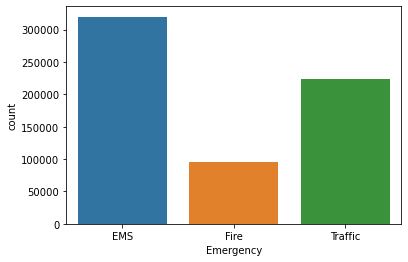

In [19]:
sns.countplot(x = dataset.Emergency, data = dataset)

In [20]:
dataset['timeStamp'] = pd.to_datetime(dataset.timeStamp)

In [21]:
dataset.timeStamp.dtype   #converted to date time

dtype('<M8[ns]')

In [22]:
dataset.nlargest(1, 'timeStamp')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Emergency
639083,40.327586,-75.986415,RT422 BYP & BENJAMIN FRANKLIN HWY E; WEST POTT...,19609.0,Traffic: ROAD OBSTRUCTION -,2020-05-23 07:52:00,WEST POTTSGROVE,RT422 BYP & BENJAMIN FRANKLIN HWY E,1,Traffic


In [23]:
dataset.nsmallest(1, 'timeStamp')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Emergency
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


In [25]:
dataset['year'] =dataset.timeStamp.dt.year

In [27]:
dataset['Month']  =dataset.timeStamp.dt.month

In [29]:
dataset['Hour'] = dataset.timeStamp.dt.hour

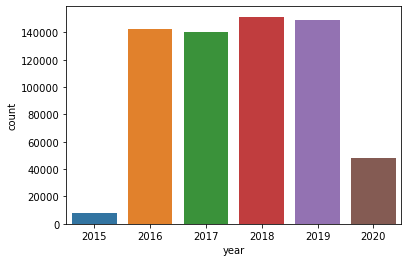

In [30]:
sns.countplot(x = dataset.year, data = dataset)

In [37]:
dataset.year.value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     47820
2015      7916
Name: year, dtype: int64

In [31]:
#we do not have complete observations for 2015 and 2020. 

### dataset2 is a dataframe containing values from complete year observations i.e. (2016,2017,2018,2019)

In [38]:
a = ['2015','2020']
dataset2  = dataset[~dataset.year.isin(a)]

In [39]:
dataset2.year.value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
Name: year, dtype: int64

In [41]:
dataset2.count()

lat          583348
lng          583348
desc         583348
zip          511667
title        583348
timeStamp    583348
twp          583103
addr         583348
e            583348
Emergency    583348
year         583348
Month        583348
Hour         583348
dtype: int64

**BY MONTH:**

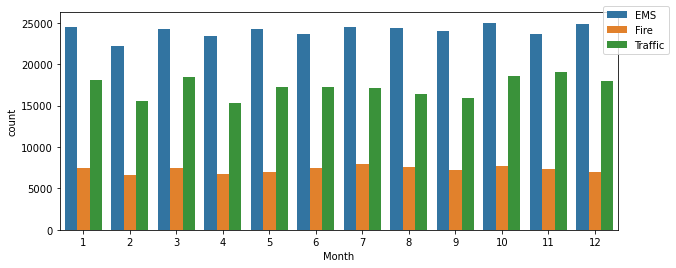

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(x= dataset2.Month, data = dataset2, hue = dataset2.Emergency)
plt.legend(bbox_to_anchor=(1.1, 1.05))

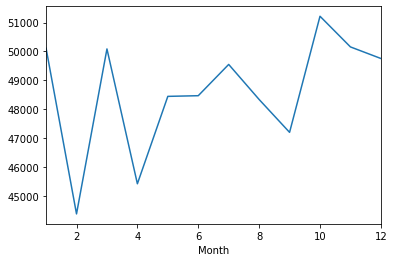

In [85]:
dataset2.groupby('Month').count()['twp'].plot()
plt.show()                                                    #I have excluded 2015,2020 to avoid discrepancy

**BY YEAR:**

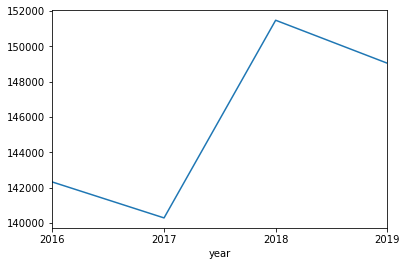

In [81]:
dataset2.groupby('year').count()['twp'].plot()
plt.xticks([2016,2017,2018,2019])
plt.show()                                  #highly scaled.

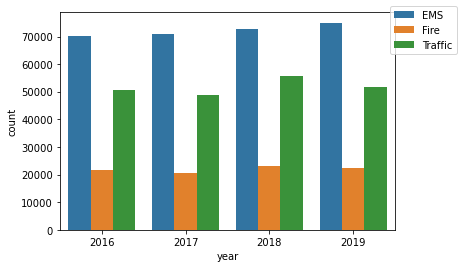

In [70]:
sns.countplot(dataset2.year, data = dataset2, hue = dataset2.Emergency )
plt.legend(bbox_to_anchor=(1.2, 1.05))

**BY HOUR:**

In [ ]:
#Number of calls are increasing with time (PEAK TIMES)

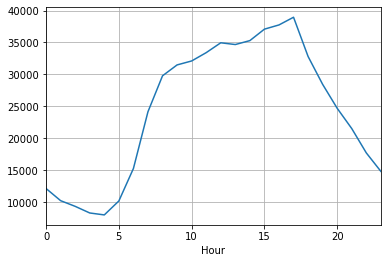

In [89]:
dataset2.groupby('Hour').count()['twp'].plot()
plt.grid(True)
plt.show()

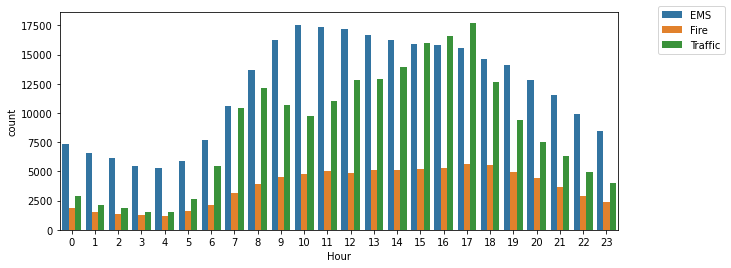

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x= dataset2.Hour, data = dataset2, hue = dataset2.Emergency)
plt.legend(bbox_to_anchor=(1.2, 1.05))

In [ ]:
#Notuce Traffic peak is at 17:00
#EMS peak is at 10:00
#Fire peak is at 17:00

In [ ]:
#Every emergency follows the same pattern. 

In [50]:
dataset2['DayofWeek'] = dataset2.timeStamp.dt.dayofweek

F:\Ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
dataset2.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Emergency,year,Month,Hour,DayofWeek
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,2016,1,0,4
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,2016,1,0,4
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,2016,1,0,4
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,2016,1,0,4
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,2016,1,0,4


**BY DAYOFWEEK:** 

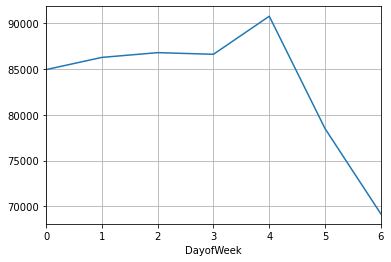

In [90]:
dataset2.groupby('DayofWeek').count()['twp'].plot()
plt.grid(True)
plt.show()                           #graph is highly scaled, but notice that values match from the v=below graph

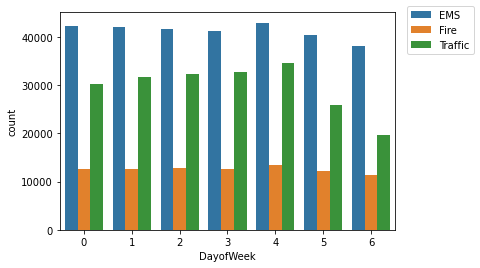

In [56]:
sns.countplot(x = dataset2.DayofWeek, data = dataset2, hue = dataset2.Emergency) 
plt.legend(bbox_to_anchor=(1.25, 1.05))


In [ ]:
#0 is Monday and 6 is Sunday

In [58]:
dataset2['Date'] = dataset2.timeStamp.dt.date

F:\Ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**FLUCTUATIONS BETWEEN ALL EMEGERNCY CALLS**

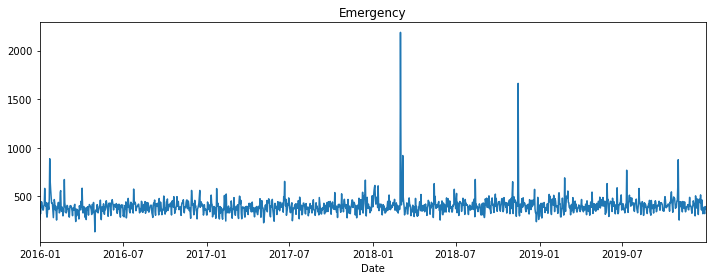

In [64]:
plt.figure(figsize=(10,4))
dataset2.groupby('Date').count()['twp'].plot()      #take any column
plt.title("Emergency")  #SUM of all Emergencies.                             
plt.tight_layout()

**FLUCTUATIONS BETWEEN ALL EMS CALLS**

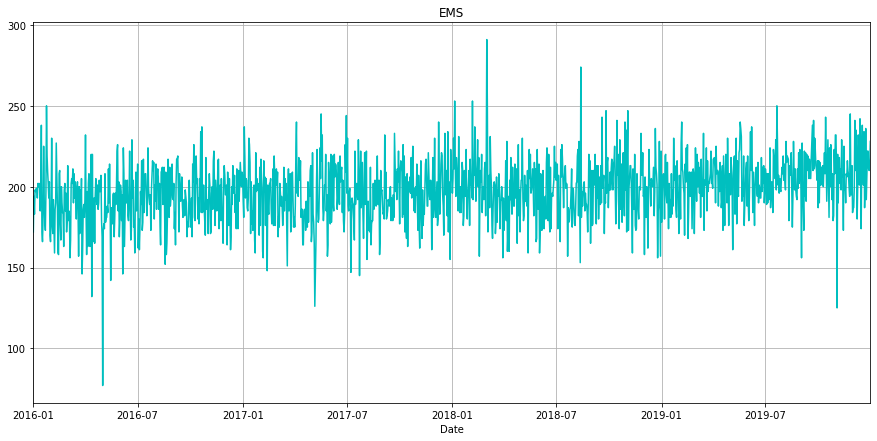

In [97]:
plt.figure(figsize=(15,7))
dataset2[dataset2['Emergency'] == 'EMS'].groupby('Date').count()['twp'].plot(color = 'c') #take any column
plt.title("EMS")   
plt.grid(True)
plt.show()     

In [ ]:
#The count for EMS goes on increasing with time

**FLUCTUATIONS BETWEEN ALL FIRE CALLS**

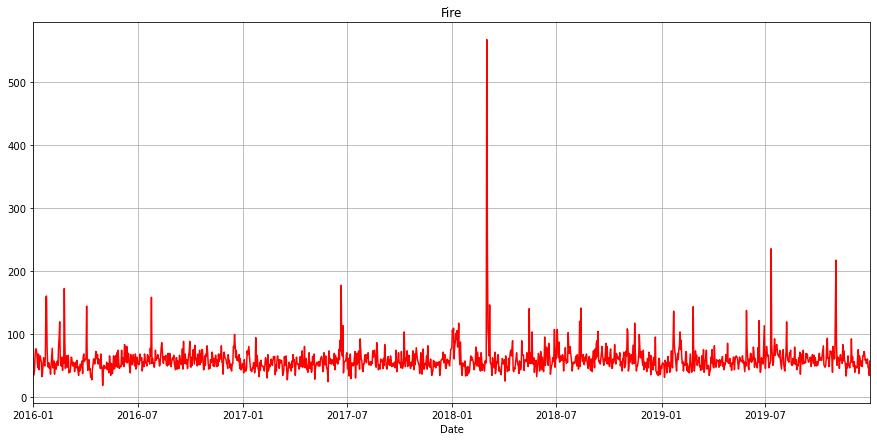

In [100]:
plt.figure(figsize=(15,7))
dataset2[dataset2['Emergency'] == 'Fire'].groupby('Date').count()['twp'].plot(color = 'r')
plt.title("Fire")   
plt.grid(True)
plt.show()  

**FLUCTUATIONS BETWEEN ALL TRAFFIC CALLS**

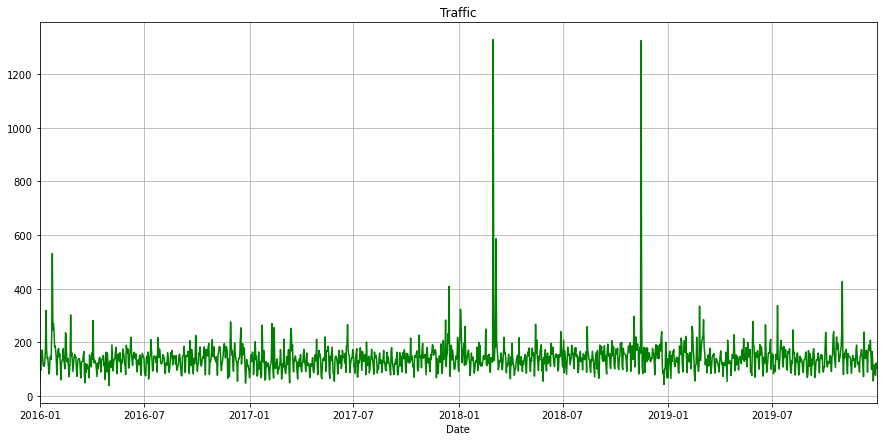

In [96]:
plt.figure(figsize=(15,7))
dataset2[dataset2['Emergency'] == 'Traffic'].groupby('Date').count()['twp'].plot(color = 'g')
plt.title("Traffic")   
plt.grid(True)
plt.show()  

**HEAT MAP BASED ON YEAR AND MONTH**

In [107]:
yearmonth  = dataset2.groupby(['year', 'Month']).count()['lat'].unstack()

In [108]:
yearmonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,13096,11396,11059,11287,11374,11732,12088,11904,11669,12502,12091,12162
2017,11605,10267,11684,11056,11719,12333,11768,11753,11332,12337,11548,12941
2018,13123,11165,14923,11240,12551,12106,12549,12315,12338,12976,14097,12144
2019,12304,11556,12441,11845,12823,12322,13166,12387,11874,13425,12446,12529


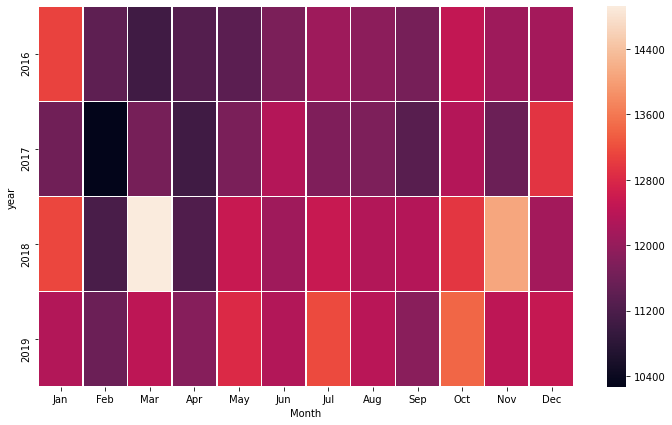

In [121]:
plt.figure(figsize=(12,7))
sns.heatmap(yearmonth, linewidths=.5, xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

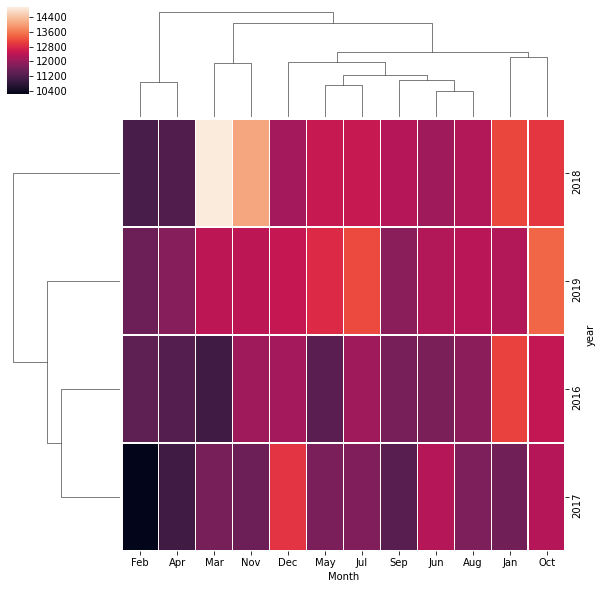

In [145]:
sns.clustermap(yearmonth, linewidths=.5, xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [ ]:
#Most number of calls were on March 2018

In [ ]:
#to verify we can see that in the 3rd and 11th month of 2018 they was a peak in number of calls, also seen in the ablove line graphbb

**HEAT MAP BASED ON MONTH AND DAYOFWEEK:**

In [113]:
dayMonth = dataset2.groupby(by=['DayofWeek','Month']).count()['lat'].unstack()
dayMonth.head()


Month,1,2,3,4,5,6,7,8,9,10,11,12
DayofWeek,,,,,,,,,,,,
0,7417,7143,6341,7170,6746,6740,7929,6854,6598,8075,6722,7241
1,8168,6519,6738,6487,7835,6689,7637,7291,6601,7948,7344,7071
2,7525,6833,7700,6261,7942,7055,6976,7984,6844,7876,7410,6435
3,7057,6348,7570,6147,7524,7850,6964,7508,6954,7482,8358,6889
4,7281,6552,9515,6922,7214,7647,7103,7336,7694,6934,8379,8247


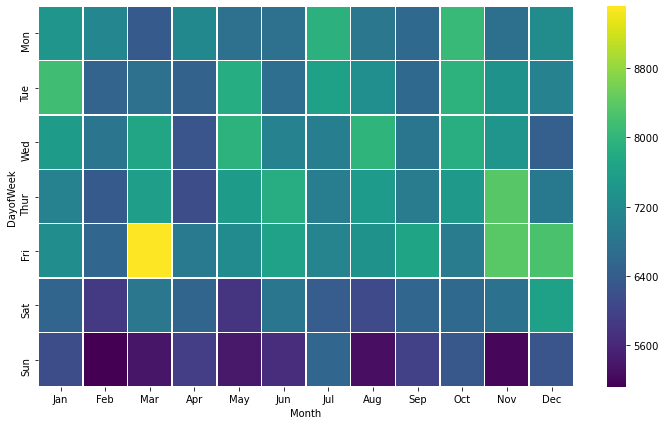

In [124]:
plt.figure(figsize=(12,7))
sns.heatmap(dayMonth, linewidths=.5, xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           yticklabels=['Mon', 'Tue', 'Wed','Thur','Fri', 'Sat', 'Sun'], cmap='viridis')

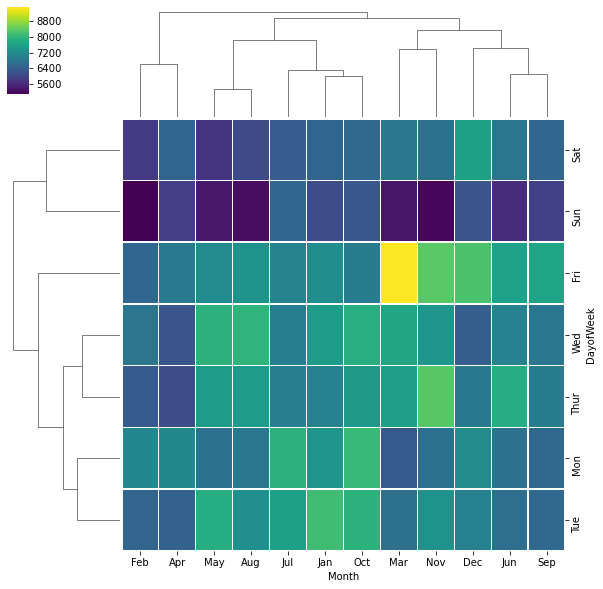

In [146]:
sns.clustermap(dayMonth, cmap='viridis',linewidth = .5,xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           yticklabels=['Mon', 'Tue', 'Wed','Thur','Fri', 'Sat', 'Sun'])

In [ ]:
#Most number of calls were more on March, Friday

**HEAT MAP BASED ON DAYOFWEEK AND HOUR:**

In [132]:
dayhour = dataset2.groupby(['DayofWeek','Hour']).count()['lat'].unstack()

In [133]:
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
0,1658,1372,1194,1118,1176,1597,2375,3947,4979,5092,...,4964,5438,5613,5677,4794,3931,3318,2849,2308,1818
1,1524,1254,1178,1069,1084,1537,2469,3959,5047,4982,...,5215,5573,5784,6114,5000,4030,3392,2947,2349,1844
2,1439,1288,1093,1104,960,1391,2366,4231,4915,4829,...,5284,5755,5969,6229,4977,4100,3617,3052,2449,1925
3,1487,1211,1227,1069,1082,1560,2517,4023,4740,4798,...,5290,5674,5589,6151,4858,4102,3553,3066,2485,2053
4,1759,1435,1285,1169,1133,1451,2360,3714,4423,4652,...,5616,6217,6274,6274,5014,4454,3845,3432,2991,2532


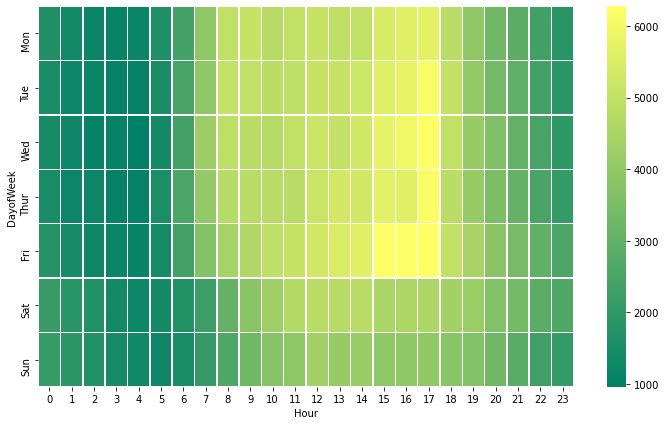

In [135]:
plt.figure(figsize=(12,7))
sns.heatmap(dayhour,linewidths=0.5, yticklabels=['Mon', 'Tue', 'Wed','Thur','Fri', 'Sat', 'Sun'], cmap='summer')

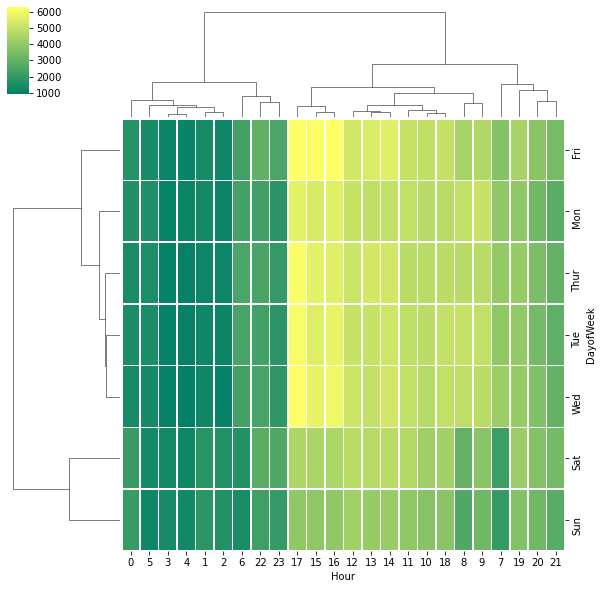

In [144]:
sns.clustermap(dayhour,linewidths=0.5, yticklabels=['Mon', 'Tue', 'Wed','Thur','Fri', 'Sat', 'Sun'], cmap='summer')

In [ ]:
#From time 15:00 to 17:00 there were maximum calls and much prevalent among the week days